# Lecture 9: Gradient Descent

This notebook will illustrate gradient descent in a simple linear regression example with a single predictor.

Let's start by importing all of our plotting functionality and numpy:

In [1]:
%matplotlib inline

/Users/civisemployee/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Here, we construct a simulated dataset:
$$y = 8x+ \epsilon$$
where
$$\epsilon \sim N(0, 2)$$

In [4]:
# np.random.rand gives us uniformly distributed random numbers [0, 1], so multiplying by 10 gives us [0, 10]
X = 10*np.random.rand(50) 
# np.random.randn gives us standard normal random numbers, so multiplying by 2 gives us N(0, 2)
eps = 2*np.random.randn(50)
# our final simulated dataset
y = 8*X+eps

Let's take a look at our dataset:

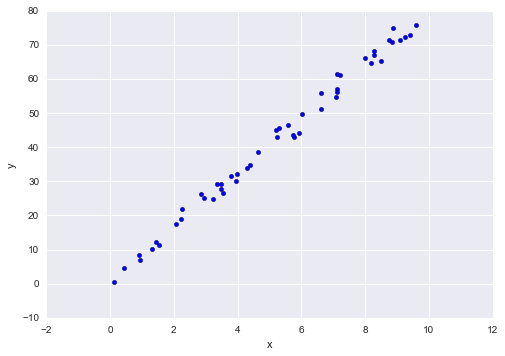

In [5]:
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's define a function that takes two arguments-a set of predictions and a set of true y values-and returns the average squared loss:

In [6]:
def loss_function(preds, y):
    sq_residuals = (y-preds)**2
    rss = np.sum(sq_residuals)/len(sq_residuals)
    return rss

Let's define a function that will take coefficients and a set of x values and return the predictions for a linear model:

In [7]:
def predict_linear_model(b0, b1, x_to_pred):
    preds = b0+b1*x_to_pred
    return preds

And finally, a function that will plot our data, a linear model, and return the loss function value:

In [8]:
def plot_data_and_preds(b0, b1, x_to_pred):
    preds = predict_linear_model(b0, b1, x_to_pred)

    plt.scatter(X, y)
    plt.plot(X, preds, c="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Regression Line", "Raw Data"])
    plt.show()

    the_loss = loss_function(preds, y)
    print "loss=%s" % the_loss
    return the_loss

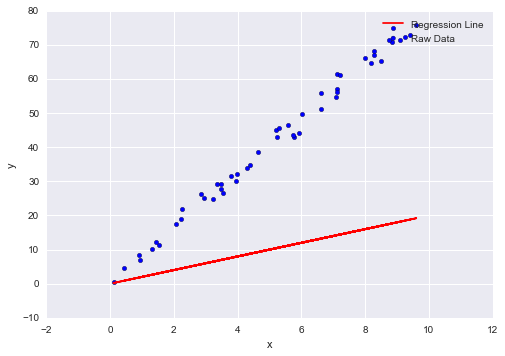

loss=1265.13146234


1265.1314623423591

In [9]:
plot_data_and_preds(0, 2, X)

This function will create a bunch of beta values, plot the linear regression line for each, calculate the loss, and make a plot of the loss as a function of beta.  Notice how to specify a default value for a parameter to a function:

In [10]:
def plot_loss_function(y, X, n_points=5):
    # equally spaced array of 5 values between -20 and 20, like the seq function in R
    beta1s = np.linspace(-20, 20, n_points)
    losses = []
    for beta1 in beta1s:
        print "beta1=%s " % beta1
        loss = plot_data_and_preds(0, beta1, X)
        losses.append(loss)
    plt.scatter(beta1s, losses)
    plt.xlabel("beta1")
    plt.ylabel("J")
    plt.show()

beta1=-20.0 


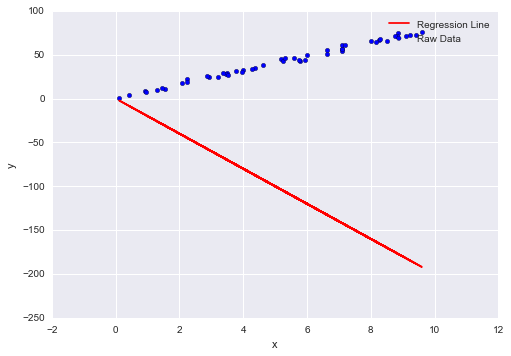

loss=27039.8338309
beta1=-17.8947368421 


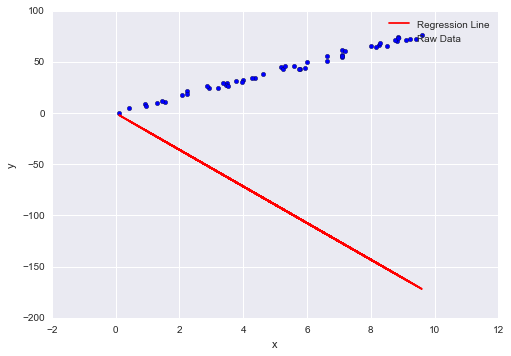

loss=23135.2297361
beta1=-15.7894736842 


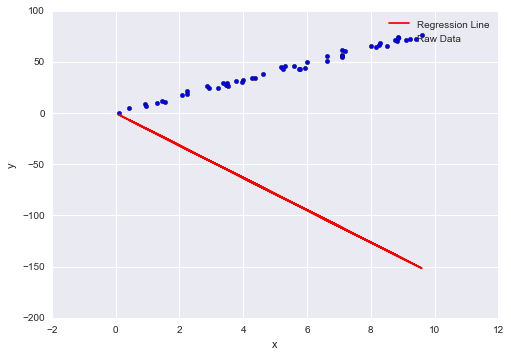

loss=19534.9908052
beta1=-13.6842105263 


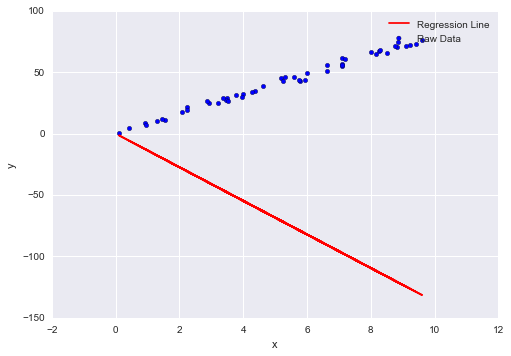

loss=16239.1170381
beta1=-11.5789473684 


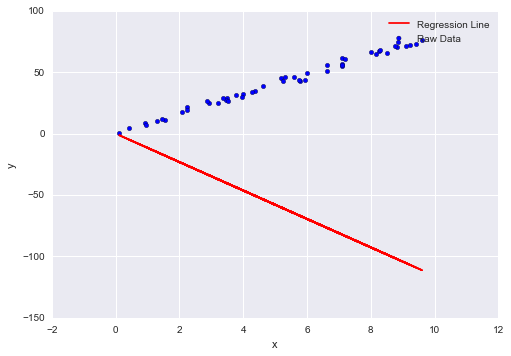

loss=13247.6084349
beta1=-9.47368421053 


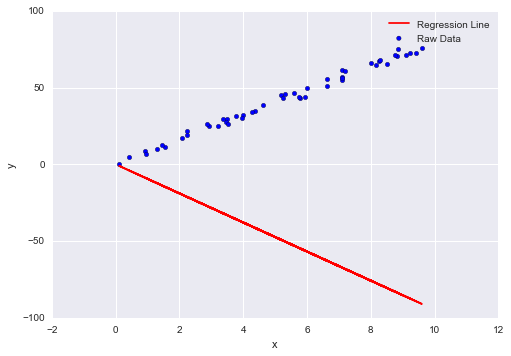

loss=10560.4649955
beta1=-7.36842105263 


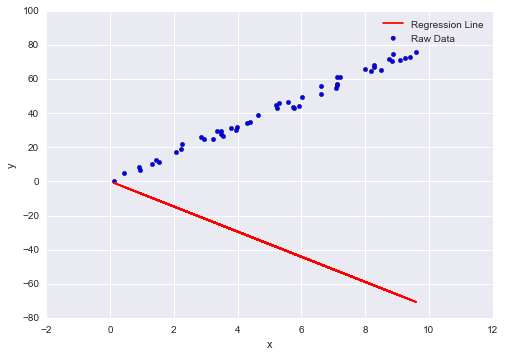

loss=8177.68672001
beta1=-5.26315789474 


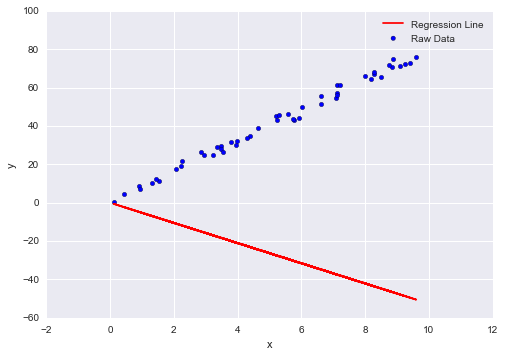

loss=6099.27360838
beta1=-3.15789473684 


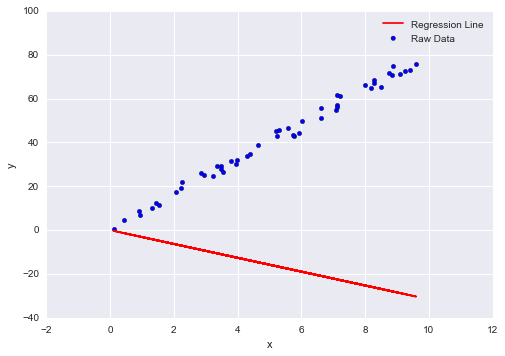

loss=4325.22566061
beta1=-1.05263157895 


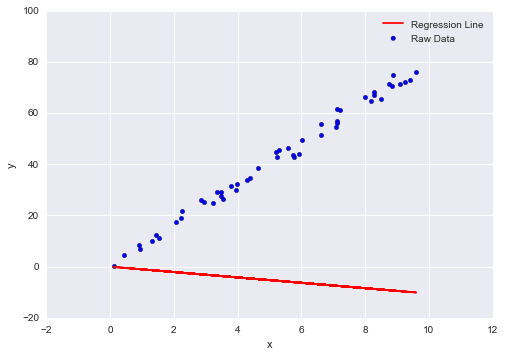

loss=2855.5428767
beta1=1.05263157895 


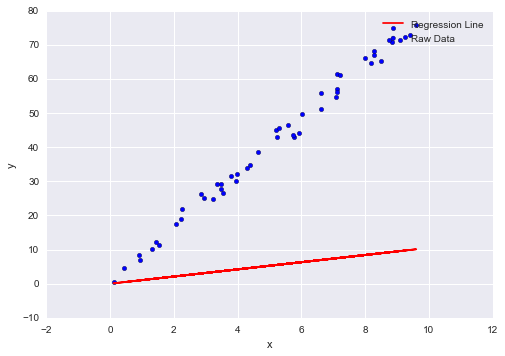

loss=1690.22525665
beta1=3.15789473684 


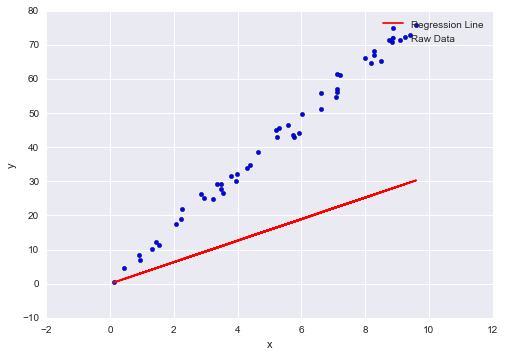

loss=829.27280047
beta1=5.26315789474 


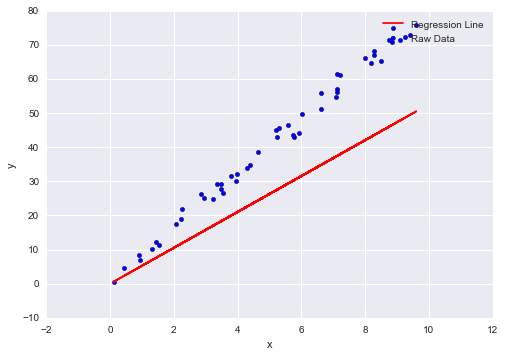

loss=272.685508151
beta1=7.36842105263 


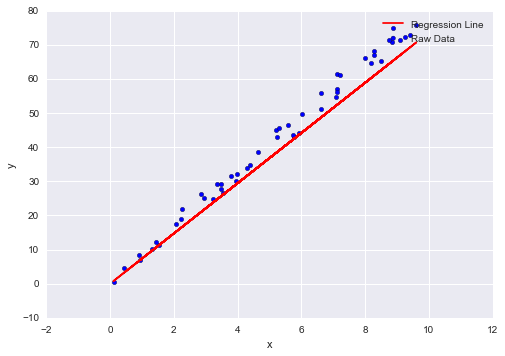

loss=20.4633796947
beta1=9.47368421053 


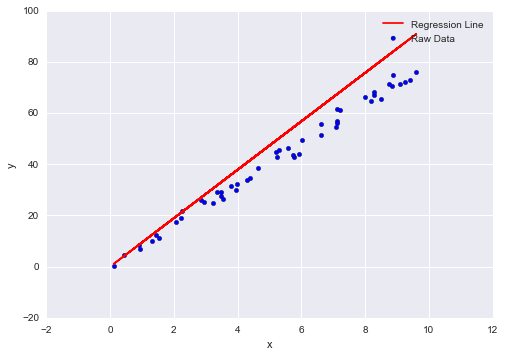

loss=72.6064151016
beta1=11.5789473684 


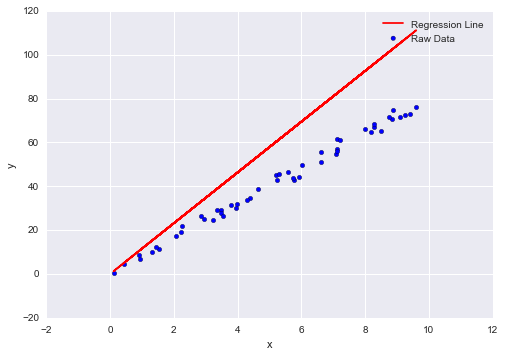

loss=429.114614372
beta1=13.6842105263 


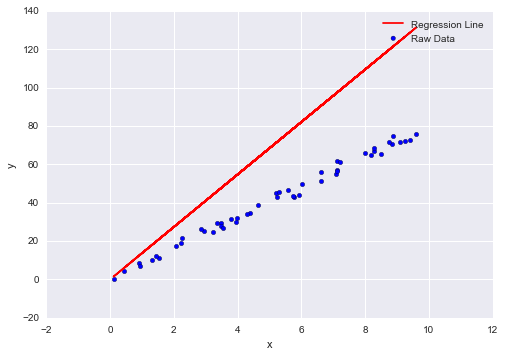

loss=1089.9879775
beta1=15.7894736842 


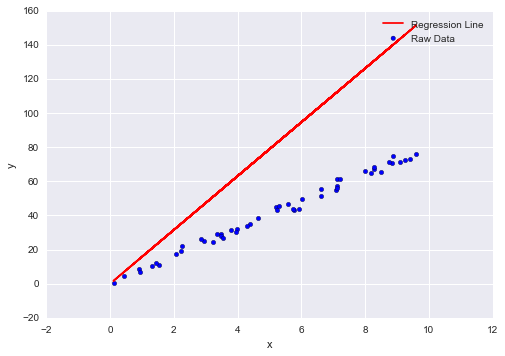

loss=2055.2265045
beta1=17.8947368421 


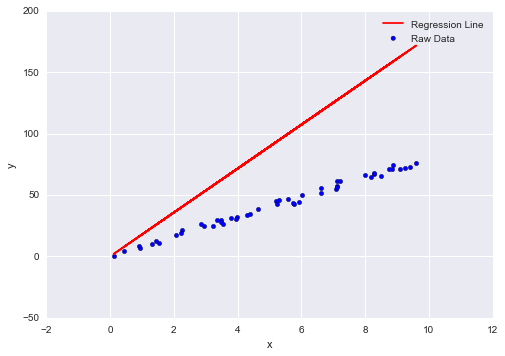

loss=3324.83019536
beta1=20.0 


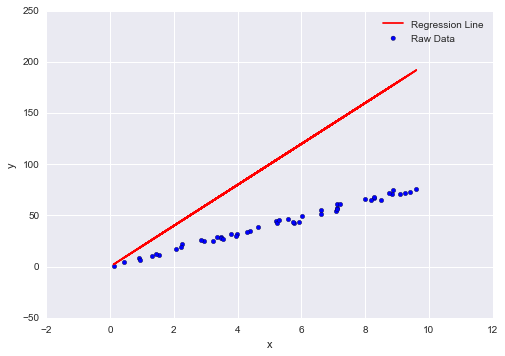

loss=4898.79905008


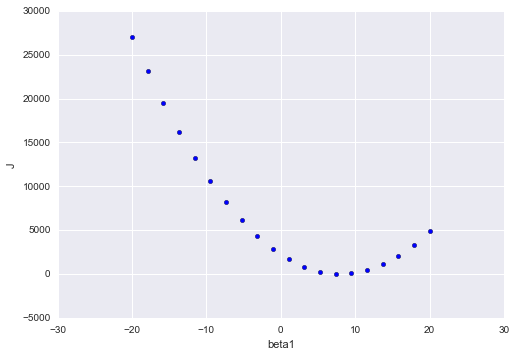

In [11]:
#plot_loss_function(y, X)
plot_loss_function(y, X, 20)

This function will return the value of the gradient of the loss function with respect to $\beta_1$:

In [12]:
def gradient_b1(b0, b1, y, X):
    grad = np.sum(-2.0*X*(y-b0-b1*X))/len(X)
    return grad

In [13]:
# the gradient at 20 is positive...
gradient_b1(0, 20, y, X)
# and at -10 is negative...
gradient_b1(0, -10, y, X)

-1240.2497704876544

And finally, this function will run our gradient descent algorithm to get to the minumum value of $\beta_1$.

In [14]:
def gradient_descent(b0_start, b1_start, y, X, learning_rate=0.01, n_steps=25):
    b1 = b1_start
    print "b1=%s" % b1
    for i in range(n_steps):
        grad = gradient_b1(b0_start, b1, y, X)
        #print "gradient=%s" % grad
        b1 = b1-learning_rate*grad
        print "b1=%s" % b1

In [15]:
# play with different learning rates: 0.00001, 0.1, 10
gradient_descent(0, 15, y, X, learning_rate=0.01)

b1=15
b1=10.2344001807
b1=8.74145165979
b1=8.27374657109
b1=8.1272257454
b1=8.0813242727
b1=8.0669444384
b1=8.06243958
b1=8.06102831553
b1=8.06058620011
b1=8.06044769591
b1=8.06040430586
b1=8.06039071279
b1=8.06038645441
b1=8.06038512036
b1=8.06038470243
b1=8.06038457151
b1=8.06038453049
b1=8.06038451764
b1=8.06038451362
b1=8.06038451235
b1=8.06038451196
b1=8.06038451184
b1=8.0603845118
b1=8.06038451179
b1=8.06038451178


In [16]:
# things can go terribly wrong and diverge if the learning rate is too high
gradient_descent(0, 20, y, X, learning_rate=10)

b1=20
b1=-8179.21932411
b1=5614221.44048
b1=-3849800291.79
b1=2.63990007956e+12
b1=-1.81024258071e+15
b1=1.24132660414e+18
b1=-8.51207321365e+20
b1=5.83693204937e+23
b1=-4.00252381457e+26
b1=2.74462624384e+29
b1=-1.88205581462e+32
b1=1.29057065504e+35
b1=-8.84975144043e+37
b1=6.06848608031e+40
b1=-4.16130594795e+43
b1=2.85350694774e+46
b1=-1.95671791564e+49
b1=1.3417682422e+52
b1=-9.20082553236e+54
b1=6.30922597616e+57
b1=-4.32638704845e+60
b1=2.96670700395e+63
b1=-2.03434189977e+66
b1=1.39499686341e+69
b1=-9.56582691013e+71


In [17]:
# a tiny learning rate with converge slowly
gradient_descent(0, 20, y, X, learning_rate=0.00001, n_steps=100)

b1=20
b1=19.9918007807
b1=19.983607192
b1=19.97541923
b1=19.9672368908
b1=19.9590601707
b1=19.9508890658
b1=19.9427235721
b1=19.9345636859
b1=19.9264094032
b1=19.9182607203
b1=19.9101176333
b1=19.9019801383
b1=19.8938482316
b1=19.8857219092
b1=19.8776011674
b1=19.8694860023
b1=19.86137641
b1=19.8532723869
b1=19.8451739289
b1=19.8370810323
b1=19.8289936934
b1=19.8209119081
b1=19.8128356729
b1=19.8047649838
b1=19.796699837
b1=19.7886402288
b1=19.7805861553
b1=19.7725376127
b1=19.7644945972
b1=19.7564571051
b1=19.7484251325
b1=19.7403986756
b1=19.7323777307
b1=19.724362294
b1=19.7163523617
b1=19.70834793
b1=19.7003489951
b1=19.6923555533
b1=19.6843676008
b1=19.6763851337
b1=19.6684081485
b1=19.6604366412
b1=19.6524706082
b1=19.6445100456
b1=19.6365549497
b1=19.6286053168
b1=19.6206611431
b1=19.6127224248
b1=19.6047891582
b1=19.5968613396
b1=19.5889389653
b1=19.5810220314
b1=19.5731105342
b1=19.5652044701
b1=19.5573038353
b1=19.549408626
b1=19.5415188385
b1=19.5336344692
b1=19.5257555142
b